In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
train_dir = "train"
validation_dir = "valid"
test_dir = "test"


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 246 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


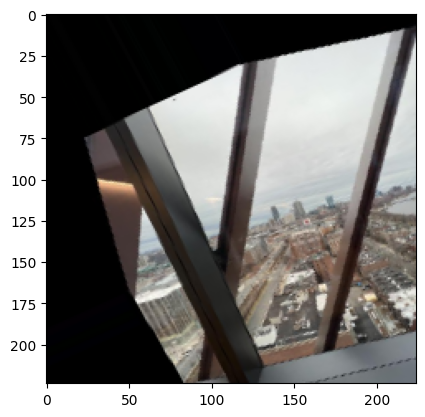

In [5]:
x, y = train_generator.next()
for i in range(0, 1):
    image = x[i]
    plt.imshow(image)
    plt.show()

    

# Baseline

In [41]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


In [42]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [43]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=2)


Epoch 1/15
8/8 - 11s - loss: 2.5137 - accuracy: 0.3618 - val_loss: 1.2763 - val_accuracy: 0.2609 - 11s/epoch - 1s/step
Epoch 2/15
8/8 - 9s - loss: 1.0749 - accuracy: 0.3740 - val_loss: 1.0830 - val_accuracy: 0.3043 - 9s/epoch - 1s/step
Epoch 3/15
8/8 - 8s - loss: 1.0576 - accuracy: 0.4390 - val_loss: 1.0466 - val_accuracy: 0.4348 - 8s/epoch - 1s/step
Epoch 4/15
8/8 - 9s - loss: 1.0374 - accuracy: 0.4390 - val_loss: 1.0434 - val_accuracy: 0.3043 - 9s/epoch - 1s/step
Epoch 5/15
8/8 - 11s - loss: 0.9936 - accuracy: 0.5325 - val_loss: 0.9470 - val_accuracy: 0.4783 - 11s/epoch - 1s/step
Epoch 6/15
8/8 - 9s - loss: 0.9529 - accuracy: 0.5569 - val_loss: 1.0419 - val_accuracy: 0.4783 - 9s/epoch - 1s/step
Epoch 7/15
8/8 - 10s - loss: 0.8667 - accuracy: 0.6748 - val_loss: 0.8478 - val_accuracy: 0.6087 - 10s/epoch - 1s/step
Epoch 8/15
8/8 - 9s - loss: 0.8169 - accuracy: 0.6423 - val_loss: 0.7960 - val_accuracy: 0.6522 - 9s/epoch - 1s/step
Epoch 9/15
8/8 - 11s - loss: 0.7340 - accuracy: 0.6951 - v

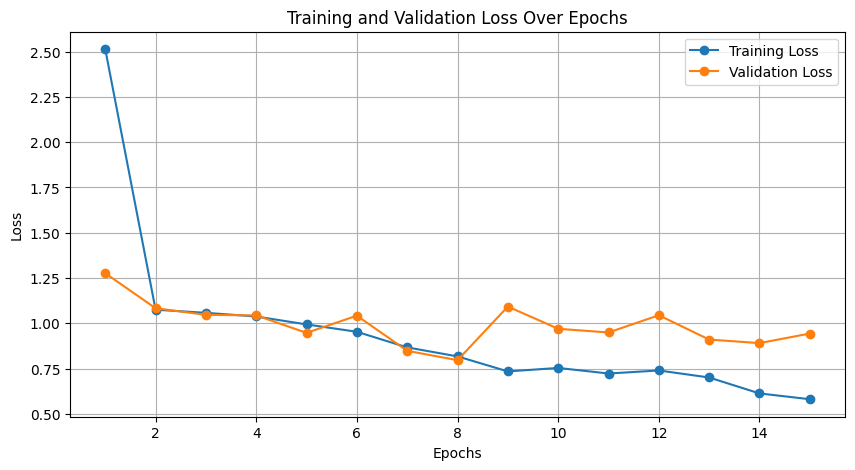

In [44]:
import matplotlib.pyplot as plt

# Extract the history data
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Create a plot for the losses
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# More convolutional layers, dropout, regularization, early stopping

In [45]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.001))
])


In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [47]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=2,
    callbacks=[early_stopping, checkpoint])

Epoch 1/30

Epoch 1: val_loss improved from inf to 1.71670, saving model to model.h5
8/8 - 16s - loss: 2.5499 - accuracy: 0.3171 - val_loss: 1.7167 - val_accuracy: 0.2174 - 16s/epoch - 2s/step
Epoch 2/30

Epoch 2: val_loss improved from 1.71670 to 1.54885, saving model to model.h5
8/8 - 14s - loss: 1.6227 - accuracy: 0.3415 - val_loss: 1.5489 - val_accuracy: 0.4783 - 14s/epoch - 2s/step
Epoch 3/30

Epoch 3: val_loss improved from 1.54885 to 1.47128, saving model to model.h5
8/8 - 14s - loss: 1.5065 - accuracy: 0.4024 - val_loss: 1.4713 - val_accuracy: 0.4783 - 14s/epoch - 2s/step
Epoch 4/30

Epoch 4: val_loss improved from 1.47128 to 1.42661, saving model to model.h5
8/8 - 14s - loss: 1.4488 - accuracy: 0.4065 - val_loss: 1.4266 - val_accuracy: 0.4783 - 14s/epoch - 2s/step
Epoch 5/30

Epoch 5: val_loss improved from 1.42661 to 1.39209, saving model to model.h5
8/8 - 14s - loss: 1.4029 - accuracy: 0.4106 - val_loss: 1.3921 - val_accuracy: 0.4783 - 14s/epoch - 2s/step
Epoch 6/30

Epoch 6

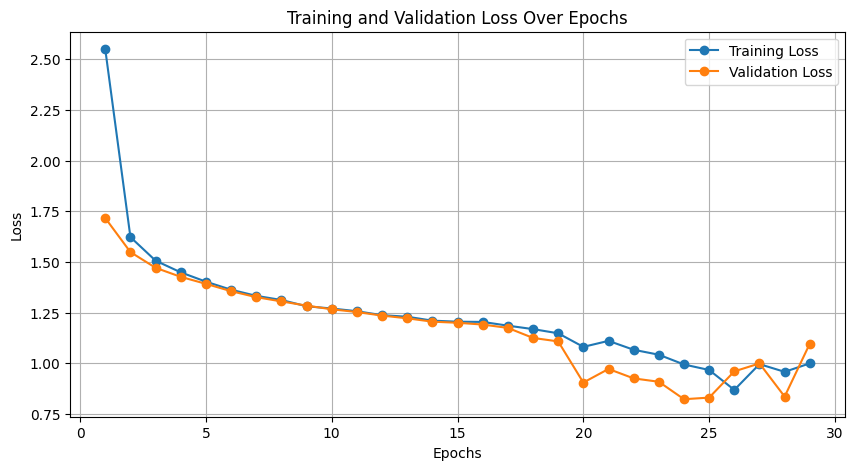

In [48]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Add data augmentation, remove some convolutional layers and dense layer,

In [8]:

from keras.layers import RandomFlip, RandomRotation, RandomZoom


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    RandomFlip("horizontal"),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    RandomRotation(0.1),
    RandomZoom(0.1),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    RandomZoom(0.1),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Conv2D(512, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(512, (3, 3), activation='relu'),
    # # MaxPooling2D((2, 2)),
    # Dropout(0.35),
    # Conv2D(512, (3, 3), activation='relu'),
    # # MaxPooling2D((2, 2)),
    # Conv2D(512, (3, 3), activation='relu'),
    # # MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.001))
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=2,
    callbacks=[early_stopping, checkpoint])

Epoch 1/30

Epoch 1: val_loss improved from inf to 1.09913, saving model to model.h5
8/8 - 18s - loss: 1.1512 - accuracy: 0.3821 - val_loss: 1.0991 - val_accuracy: 0.4783 - 18s/epoch - 2s/step
Epoch 2/30

Epoch 2: val_loss did not improve from 1.09913
8/8 - 13s - loss: 1.0885 - accuracy: 0.4146 - val_loss: 1.1052 - val_accuracy: 0.2174 - 13s/epoch - 2s/step
Epoch 3/30

Epoch 3: val_loss improved from 1.09913 to 1.09608, saving model to model.h5
8/8 - 13s - loss: 1.1020 - accuracy: 0.3780 - val_loss: 1.0961 - val_accuracy: 0.4783 - 13s/epoch - 2s/step
Epoch 4/30

Epoch 4: val_loss improved from 1.09608 to 1.09344, saving model to model.h5
8/8 - 12s - loss: 1.0883 - accuracy: 0.4106 - val_loss: 1.0934 - val_accuracy: 0.4783 - 12s/epoch - 2s/step
Epoch 5/30

Epoch 5: val_loss improved from 1.09344 to 1.09207, saving model to model.h5
8/8 - 12s - loss: 1.0925 - accuracy: 0.4065 - val_loss: 1.0921 - val_accuracy: 0.4783 - 12s/epoch - 2s/step
Epoch 6/30

Epoch 6: val_loss did not improve fro

# Transfer Learning

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=2,
    callbacks=[early_stopping, checkpoint])

Epoch 1/30

Epoch 1: val_loss improved from inf to 2.07119, saving model to model.h5
8/8 - 30s - loss: 7.3299 - accuracy: 0.3496 - val_loss: 2.0712 - val_accuracy: 0.4783 - 30s/epoch - 4s/step
Epoch 2/30

Epoch 2: val_loss improved from 2.07119 to 1.42352, saving model to model.h5
8/8 - 29s - loss: 1.4947 - accuracy: 0.5935 - val_loss: 1.4235 - val_accuracy: 0.6522 - 29s/epoch - 4s/step
Epoch 3/30

Epoch 3: val_loss improved from 1.42352 to 0.61875, saving model to model.h5
8/8 - 29s - loss: 1.1253 - accuracy: 0.6585 - val_loss: 0.6187 - val_accuracy: 0.7826 - 29s/epoch - 4s/step
Epoch 4/30

Epoch 4: val_loss improved from 0.61875 to 0.60078, saving model to model.h5
8/8 - 29s - loss: 0.5704 - accuracy: 0.7724 - val_loss: 0.6008 - val_accuracy: 0.7826 - 29s/epoch - 4s/step
Epoch 5/30

Epoch 5: val_loss improved from 0.60078 to 0.47994, saving model to model.h5
8/8 - 29s - loss: 0.3930 - accuracy: 0.8455 - val_loss: 0.4799 - val_accuracy: 0.8261 - 29s/epoch - 4s/step
Epoch 6/30

Epoch 6

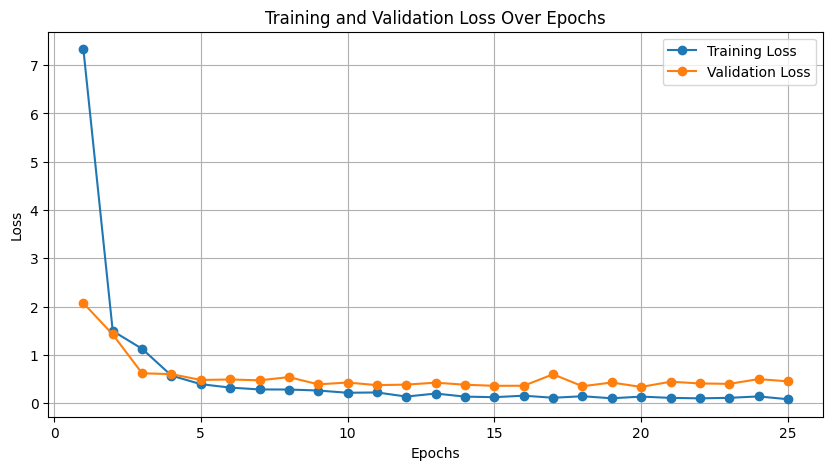

In [35]:

training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# Test

test_datagen = ImageDataGenerator(rescale=1./255)

# Adjust the batch size to match your total number of test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=12,  # Load all 12 images at once
    class_mode='categorical',
    shuffle=False)




Found 12 images belonging to 3 classes.


In [32]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 [==============================] - 1s 1s/step - loss: 0.3547 - accuracy: 0.8333
Test Loss: 0.3547340929508209
Test Accuracy: 0.8333333134651184


In [33]:
predictions = model.predict(test_generator)
# If you want to get the class with the highest probability for each sample
predicted_classes = np.argmax(predictions, axis=1)


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


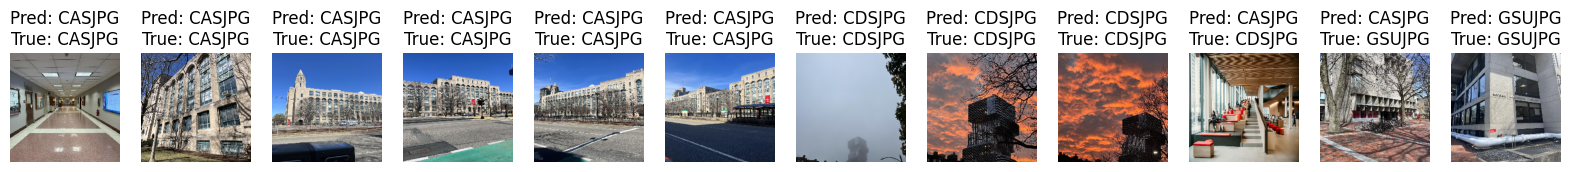

In [34]:
import matplotlib.pyplot as plt
# Fetch one batch of images and labels
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

# Decode predictions to readable labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Plotting the images with predictions and true labels
fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(20, 2))  # Adjust size and number of images here
for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    pred_label = class_labels[predicted_classes[i]]
    true_label = class_labels[true_classes[i]]
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}")
plt.show()
